# 5. Introduction to MATLAB/octave

<a href="https://www.mathworks.com/" target="_blank">MATLAB</a> is a powerful, widely used, "desktop environment tuned for iterative analysis and design processes" and "a programming language that expresses matrix and array mathematics directly." It is a commercial product and requires an [expensive] license to run, although student discounts do exist.

GNU Octave (in short, <tt>octave</tt>), is a free-software alternative to MATLAB. Its interpreter is mostly compatible with MATLAB and reproduces a large part of the numerical facilities of MATLAB. It is available as both a command-line interpreter and as a GUI-driven programming environment. As free software it has acquired a broad distribution in the scientific community. In particular, it is available on vastly parallel computing farms dedicated to scientific computing (such as SHARCNET), which makes it the environment of choice for many physicists. It is also available both as a standalone kernel and as a loadable extension within <code>jupyter</code> notebooks; these are installed on our cluster.

This notebook is, in fact, running under an <code>octave</code> kernel (see in the upper right corner).

As the two environments are almost 100% syntax-compatible, we will always refer to the code as <code>octave</code>, but almost everything will also be applicable to MATLAB environments.

## Matrices and vectors

One of the important quirks of <code>octave</code> syntax is that its elementary object is a matrix. If in <code>eXtrema</code>, separate types exist for vectors and matrices, <code>octave</code> takes the view of vectors being a particular kind of a matrix, with one of the dimensions being of size 1.  Thus it distinguishes between column and row vectors and many errors you encounter will likely have to do with failures to keep track and convert between the two types of vectors as appropriate.

Here are a few different ways of creating and manipulating matrices and vectors.

In [1]:
A = [ 1 2 3; 4 5 6]
B = rand(4,3)
I = eye(3)
Z = zeros(2,2)

A =

   1   2   3
   4   5   6

B =

   0.576952   0.226006   0.473877
   0.305551   0.433975   0.420620
   0.234508   0.694907   0.164800
   0.823089   0.834511   0.029354

I =

Diagonal Matrix

   1   0   0
   0   1   0
   0   0   1

Z =

   0   0
   0   0



In [2]:
v = [1 2 3]
v'
w = [4;5;6]
w'
t = zeros(3,1)
s = zeros(1,8)

v =

   1   2   3

ans =

   1
   2
   3

w =

   4
   5
   6

ans =

   4   5   6

t =

   0
   0
   0

s =

   0   0   0   0   0   0   0   0



In [3]:
v*w
1*4 + 2*5 + 3*6
v.*w'
[1*4 2*5 3*6]
v.*w
[1*4 2*4 3*4; 1*5 2*5 3*5; 1*6 2*6 3*6]
cross(v,w')
cross(w,v')
cross(w,v)

ans =  32
ans =  32
ans =

    4   10   18

ans =

    4   10   18

ans =

    4    8   12
    5   10   15
    6   12   18

ans =

    4    8   12
    5   10   15
    6   12   18

ans =

  -3   6  -3

ans =

   3
  -6
   3

    cross at line 58 column 7
ans =

   3
  -6
   3



In [4]:
system('cp -r /work/5P10/Lectures/octave-tutorial ./');

### if you are NOT on one of our workstations, use the following:
###  -r  = --recursive
###  -nH = --no-host-directories
###  -np = --no-parent
###  -R  = --reject
#system('wget -r -nH -np --cut-dirs=3 -R "index.html*" http://www.physics.brocku.ca/Courses/5P10/Lectures/octave-tutorial/');

## Elementary operations and interactions with <tt>octave</tt>

There is no need to reproduce the essential introduction, as it exists:

  * <a href="./octave-tutorial/" target="_blank">a simple tutorial</a>; and
  * a comprehensive <a href="https://www.gnu.org/software/octave/doc/v4.2.0/" target="_blank">Reference Manual</a>.

Students are expected to work through the tutorial on their own, and learn how to use and search the online documentation. octaveBasic must be completed now, other parts of the tutorial will be reviewed later as needed, and completed as homework.

A crucial part for us is the ability to read in, analyze and plot experimentala data. The rest of this notebook is dedicated to learning how to do this.

In [5]:
%cd ~/5P10

/home/esternin/5P10


In [6]:
%%file VI.dat
#  V   I,mA
  0   0.468
  1   0.405
  2   0.342
  3   0.279
  4   0.216
  5   0.153
  6   0.090
  6.4 0.064

Created file '/home/esternin/5P10/VI.dat'.


The basic operation for this simple file is trivial: we know it's a text file, with one header line and two columns of floating-point data:

In [7]:
[V,I] = textread('VI.dat',"%f %f",'headerlines',1)

V =

   0.00000
   1.00000
   2.00000
   3.00000
   4.00000
   5.00000
   6.00000
   6.40000

I =

   0.468000
   0.405000
   0.342000
   0.279000
   0.216000
   0.153000
   0.090000
   0.064000



In general, though, <code>octave</code> has multiple ways of bringing in data, and can deal with a variety of file formats, some highly structured (like spreadheet files, for example). When little is known about the format of the data file, <code>importdata()</code> is a useful tool. After a little digging through the file structure, the same result can be obtained: two column vectors, V and I.

In [8]:
D = importdata('VI.dat','',1);

### the file is imported as one unified structure, so "whos" yields little insight
whos D
### the first step is to identify what is in the structure ...
fieldnames(D)

#D.textdata
#D.colheaders
#D.data

### ... and then follow down to locate and extract the data itself
#V = D.data(:,1)
#I = D.data(:,2)

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        D           9x1                         99  cell

Total is 9 elements using 99 bytes

error: fieldnames: Invalid input argument
error: called from
    fieldnames at line 60 column 5


In [9]:
%plot inline

ans =

   0.00000   0.00000
   1.00000   0.40500
   2.00000   0.68400
   3.00000   0.83700
   4.00000   0.86400
   5.00000   0.76500
   6.00000   0.54000
   6.40000   0.40960



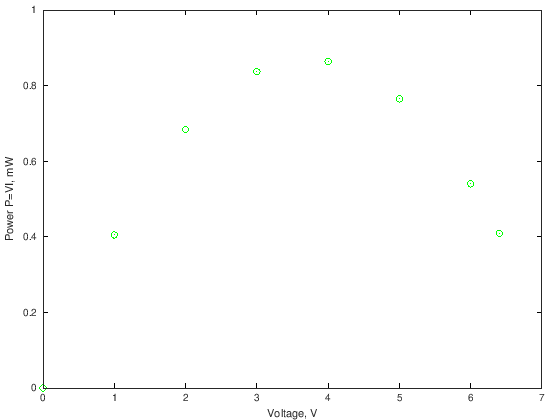

In [10]:
[V,I] = textread('VI.dat',"%f %f",'headerlines',1);

[V,V.*I]

plot(V,V.*I,'go')
#,'go','MarkerSize',2);
ylabel("Power P=VI, mW");
xlabel("Voltage, V");

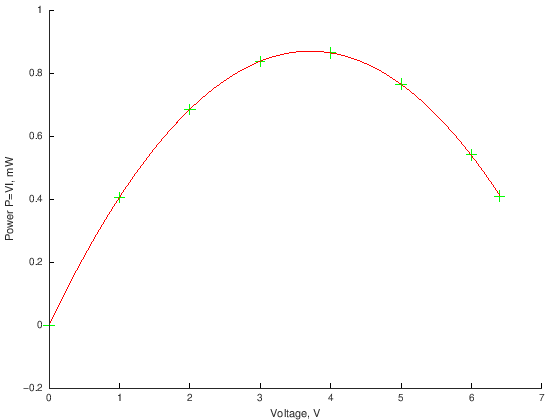

In [11]:
[V,I] = textread('VI.dat',"%f %f",'headerlines',1);

### this is needed if the graph is to contain multiple plots
hold on

plot(V,V.*I,'g+','MarkerSize',10);

### fit to n-degree polynomial yields a vector of n+1 coefficients of fit
cf = polyfit(V,V.*I,2);
### which can be used to generate a polynomial function that can be plotted
#plot(V,polyval(cf,V),'r-');

### except there aren't enough points to define a smooth curve, 
### so apply the same fit coefficients to a much finer-grid vector
VV = linspace(min(V),max(V),1000);
plot(VV,polyval(cf,VV),'r-');

ylabel("Power P=VI, mW");
xlabel("Voltage, V");

hold off

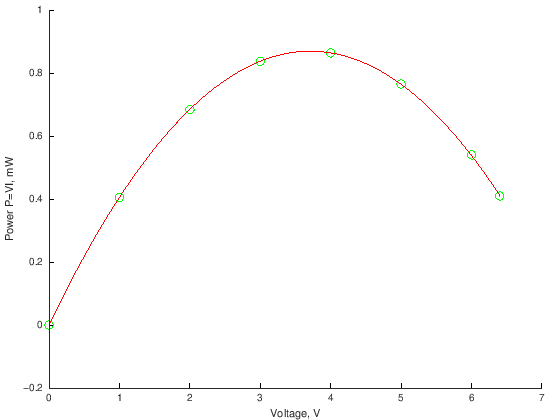

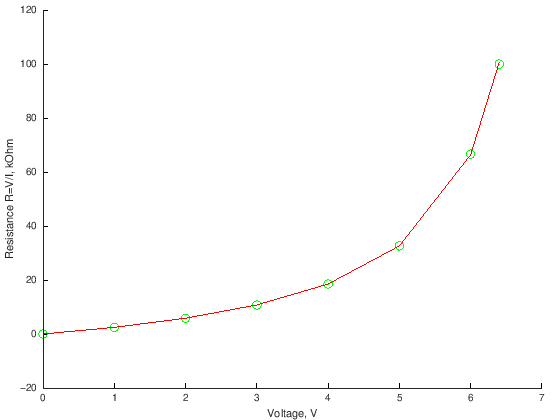

In [12]:
[V,I] = textread('VI.dat',"%f %f",'headerlines',1);

### here, for inline SVG graphics, multiple figures (frames) will show up on the same graph;
### when using built-in octave-to-gnuplot interface, these commands would produce multiple graphics windows
figure(1)

### this is needed if the figure is to contain multiple plots
hold on

plot(V,V.*I,'go','MarkerSize',8);     # P = V*I

### fit to n-degree polynomial yields a vector of n+1 coefficients of fit
cf = polyfit(V,V.*I,2);
### which can be used to generate a polynomial function that can be plotted
#plot(V,polyval(cf,V),'r-');

### except there aren't enough points to define a smooth curve, 
### so apply the same fit coefficients to a much finer-grid vector
VV = linspace(min(V),max(V),1000);
plot(VV,polyval(cf,VV),'r-');

ylabel("Power P=VI, mW");
xlabel("Voltage, V");

hold off

figure(2)
hold on
plot(V,V./I,'go','MarkerSize',8);      # R = V/I

plot(V,polyval(cf,V)./(I.*I),'r-');      # R = V/I = P/I^2

#II = polyval(cf,VV) ./ VV;               # I = P/V
#plot(VV,polyval(cf,VV)./(II.*II),'r-');  # R = V/I = P/I^2

ylabel("Resistance R=V/I, kOhm");
xlabel("Voltage, V");
hold off

print -dpng VI.png

## Homework
<p>
    Work your way through the remaining sections of the <code>octave</code> tutorial.
<p>
    Convert one of previously obtained graphs (the analysis of data from <a href="VI.dat">VI.dat</a> or <a href="Cavendish.dat">Cavendish.dat</a>) from <code>gnuplot</code> or <code>eXtrema</code> to <code>octave</code>. Demonstrate how to display multiple frames (one above or beside the other), annotate your figures clearly to communicate the same information (maximum of power, and the resistance at which this maximum occurs, or the period of oscillations, etc.).